1. Выберите наборы данных. которые можно интерпретировать, как временные ряды:

а) зависимость цены на недвижимость в конкретном регионе от времени,

б) скорость полета самолета при перелете из аэропорта А в аэропорт В,

в) количество отказов компьютера,

г) число обращений в поликлинику по району,

д) координаты автобуса при движении по маршруту,

е) координаты фигуры нарушителя в файле видеофиксации охранной системы.

вариант а), точно сказано, что в признаках есть время 

2. Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 
import seaborn as sns

from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])

In [3]:
data.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
DUQ_MW    119068 non-null float64
dtypes: float64(1)
memory usage: 1.8 MB


Результат анализа типов показывает, что интервал изменения индексов начинается от 2005-12-31 01:00:00 и идет до 2018-01-02 00:00:00. Мы знаем из описания, что шаг измерений по времени составляет 1 час. Общий объем данных составляет 119068 значений, а тип измеряемой информации при записи был определен как float64. 

In [5]:
data.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


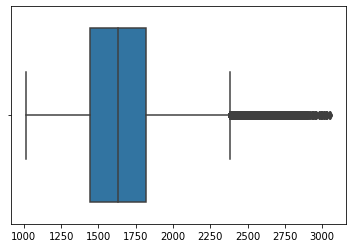

In [6]:
sns.boxplot(data.values)

In [7]:
# проверим пропуски
data['DUQ_MW'].isnull().sum()

0

Text(0, 0.5, 'МВт')

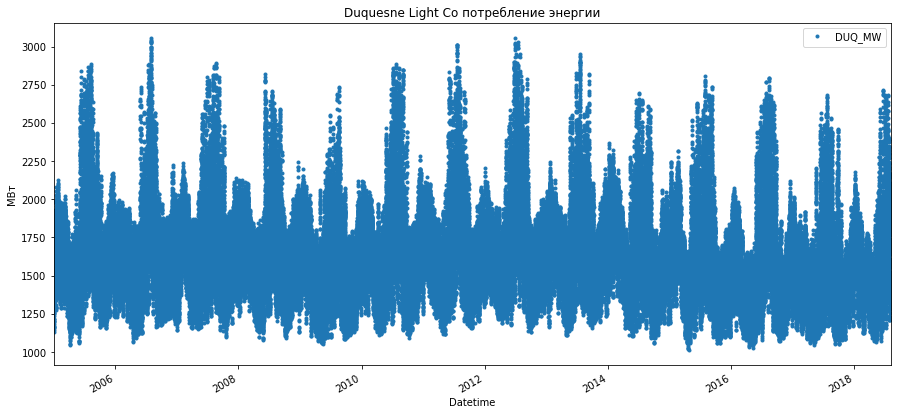

In [9]:
data.plot( style = '.', figsize = ( 15, 7 ), title = 'Duquesne Light Co потребление энергии' )
plt.ylabel ( 'МВт' )

### Обсуждение визуализации

- Основные статистики показали, что пропусков нет
- Визуальный анализ показывает что:
    - Предъявленные данные имеют циклы

In [10]:
# Теперь целые
data['DUQ_MW'] = data['DUQ_MW'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
DUQ_MW    119068 non-null int32
dtypes: int32(1)
memory usage: 1.4 MB


Снизили объем потребляемой памяти с 1.8 Мб до 1.4 Мб

3. Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.

In [11]:
brent_data = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])
brent_data.head()

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


In [14]:
brent_data_mounth = brent_data.resample('M').mean()
brent_data_mounth.head()

,Значение
Дата,
2010-09-30,78.228148
2010-10-31,83.473462
2010-11-30,86.178077
2010-12-31,92.232308
2011-01-31,97.033200


In [15]:
brent_data_week = brent_data.resample('W').mean()
brent_data_week.head()

,Значение
Дата,
2010-09-05,76.616000
2010-09-12,77.673333
2010-09-19,78.693333
2010-09-26,78.518333
2010-10-03,81.211667


4. Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

In [16]:
brent_data_year = brent_data.resample('Y').mean()
brent_data_year.head()

,Значение
Дата,
2010-12-31,84.963238
2011-12-31,110.758746
2012-12-31,111.377484
2013-12-31,108.137114
2014-12-31,99.435493


In [26]:
brent_data_week_std = brent_data.resample(rule="W", how=np.std)
brent_data_mounth_std = brent_data.resample(rule="M", how=np.std)
brent_data_year_std = brent_data.resample(rule="Y", how=np.std)

C:\Users\sych_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  """Entry point for launching an IPython kernel.
C:\Users\sych_\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  
C:\Users\sych_\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  This is separate from the ipykernel package so we can avoid doing imports until


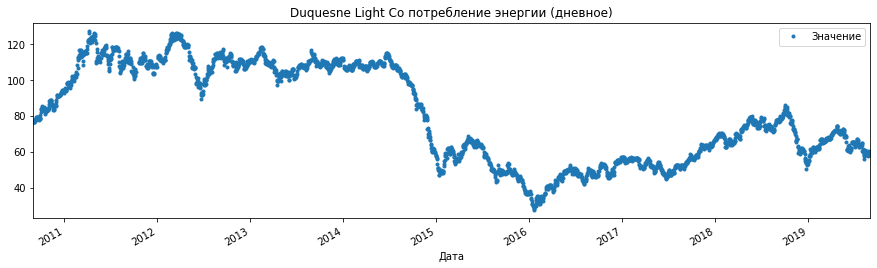

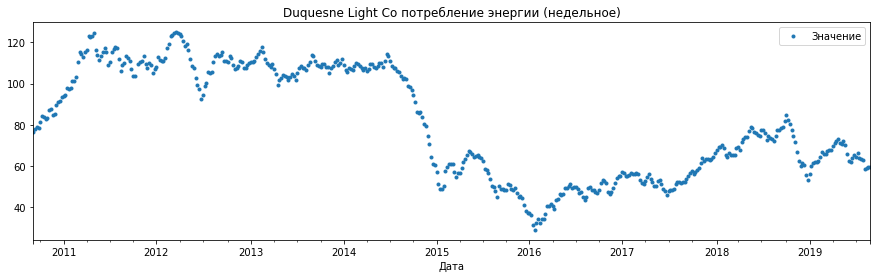

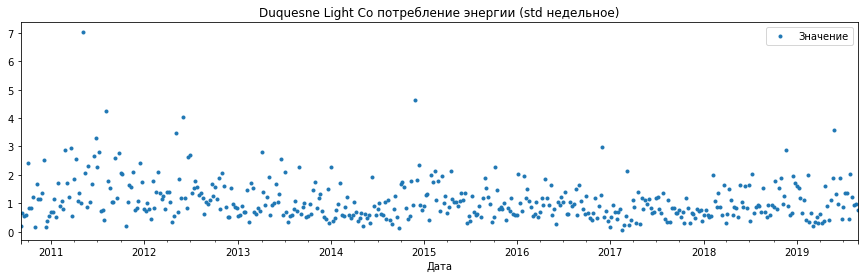

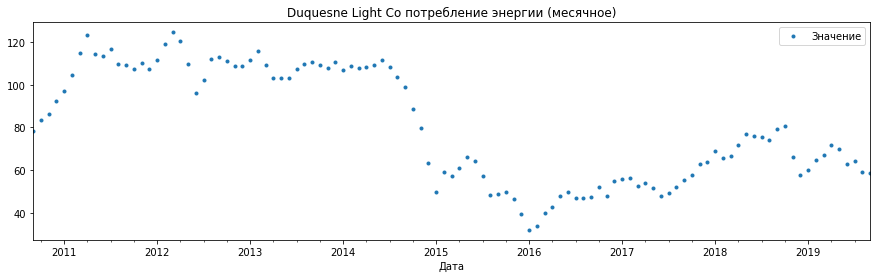

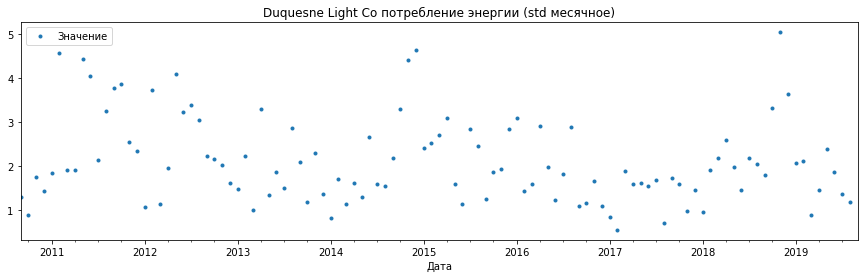

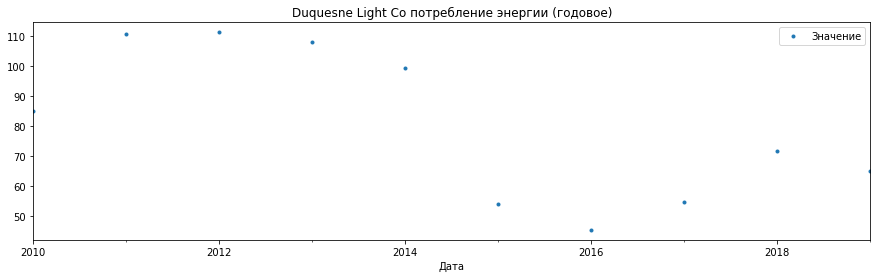

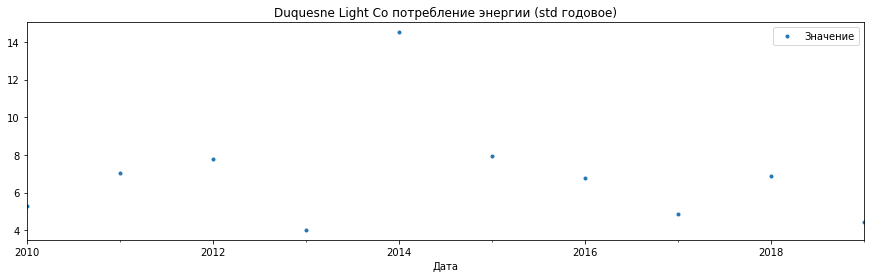

In [27]:
brent_data.plot( style = '.', figsize = ( 15, 4 ), title = 'Duquesne Light Co потребление энергии (дневное)' )

brent_data_week.plot( style = '.', figsize = ( 15, 4 ), title = 'Duquesne Light Co потребление энергии (недельное)' )
brent_data_week_std.plot( style = '.', figsize = ( 15, 4 ), title = 'Duquesne Light Co потребление энергии (std недельное)' )

brent_data_mounth.plot( style = '.', figsize = ( 15, 4 ), title = 'Duquesne Light Co потребление энергии (месячное)' )
brent_data_mounth_std.plot( style = '.', figsize = ( 15, 4 ), title = 'Duquesne Light Co потребление энергии (std месячное)' )

brent_data_year.plot( style = '.', figsize = ( 15, 4), title = 'Duquesne Light Co потребление энергии (годовое)' )
brent_data_year_std.plot( style = '.', figsize = ( 15, 4), title = 'Duquesne Light Co потребление энергии (std годовое)' )

5. Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.

Поведение цены на нефть не изменилось, единственное, гововой график стал похож на полином.